# Read BMP and Show as JPG

### https://eeweb.engineering.nyu.edu/~yao/EL5123/SampleData.html

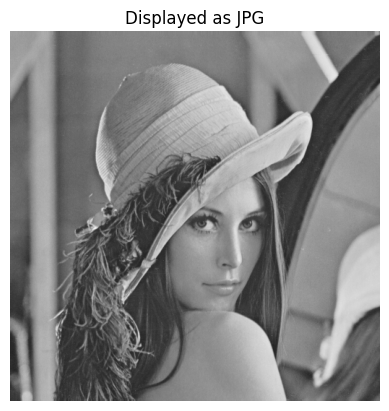

In [1]:
import cv2
import matplotlib.pyplot as plt

# 1. Read the BMP image
bmp_path = 'lena_gray.bmp'
image_bgr = cv2.imread(bmp_path)

# 2. Convert BGR to RGB for notebook display
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 3. Save as JPG (optional, to disk)
cv2.imwrite('converted_image.jpg', image_bgr)

# 4. Show the image in the notebook
plt.imshow(image_rgb)
plt.title("Displayed as JPG")
plt.axis('off')
plt.show()


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read grayscale BMP directly
image = cv2.imread('lena_gray.bmp', cv2.IMREAD_GRAYSCALE)

print("Image shape (rows, cols):", image.shape)
print("Pixel intensity coefficients (top-left 8x8 block):\n")
print(image[:8, :8])

Image shape (rows, cols): (512, 512)
Pixel intensity coefficients (top-left 8x8 block):

[[160 160 160 159 161 156 161 159]
 [161 160 159 159 161 155 161 159]
 [160 161 160 158 161 156 162 159]
 [161 161 159 159 161 156 161 159]
 [160 160 160 159 161 156 162 159]
 [162 162 157 154 159 159 157 159]
 [159 159 162 157 159 161 158 155]
 [157 157 155 155 157 158 155 157]]


### Visualize coefficients as numbers (small region)

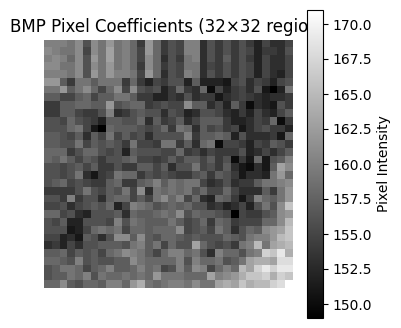

In [3]:
plt.figure(figsize=(4,4))
plt.imshow(image[:32, :32], cmap='gray')
plt.colorbar(label="Pixel Intensity")
plt.title("BMP Pixel Coefficients (32×32 region)")
plt.axis('off')
plt.show()

### Histogram of BMP coefficients

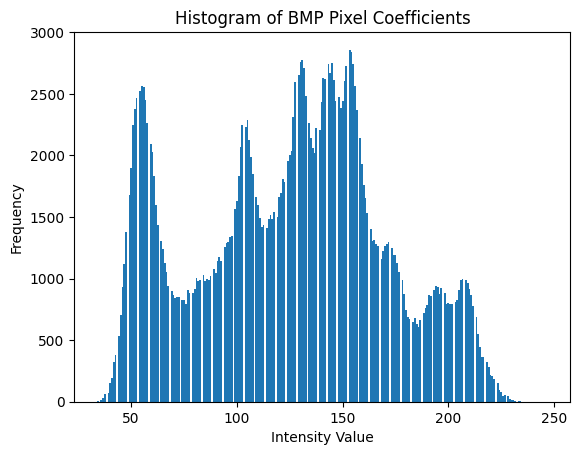

In [4]:
plt.hist(image.flatten(), bins=256)
plt.title("Histogram of BMP Pixel Coefficients")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.show()


### BMP header information (metadata coefficients)

In [5]:
with open('lena_gray.bmp', 'rb') as f:
    header = f.read(54)

file_size = int.from_bytes(header[2:6], 'little')
width = int.from_bytes(header[18:22], 'little')
height = int.from_bytes(header[22:26], 'little')
bit_depth = int.from_bytes(header[28:30], 'little')

print("BMP Header Info")
print("File size:", file_size, "bytes")
print("Width:", width)
print("Height:", height)
print("Bit depth:", bit_depth)


BMP Header Info
File size: 263224 bytes
Width: 512
Height: 512
Bit depth: 8


In [6]:
!pip install jpeglib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.9 MB 12.9 MB/s eta 0:00:01
   ---------- ----------------------------- 2.6/9.9 MB 6.3 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.9 MB 8.5 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.9 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 10.9 MB/s  0:00:00

   ---------------------------------------- 0/2 [wheel]
   ---------------------------------------- 0/2 [wheel]
   -------------------- ------------------- 1/2 [jpeglib]
   -------------------- ------------------- 1/2 [jpeglib]
   -------------------- ------------------- 1/2 [jpeglib]
   -------------------- ------------------- 1/2 [jpeglib]
   -------------------- ------------------- 1/2 [jpeglib]
   -------------------- ------------------- 1/2 [jpeglib]
   ---------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Extract JPG Coefficients:

In [7]:
import jpeglib
import numpy as np

# Load the JPEG version of the image
jpeg_path = 'converted_image.jpg'
im = jpeglib.read_dct(jpeg_path)

# Extract data
# Y (Luminance) coefficients shape: (Blocks_H, Blocks_W, 8, 8)
y_coeffs = im.Y
# Quantization tables (usually 2: one for Luminance, one for Chrominance)
q_tables = im.qt

print(f"Luminance DCT Coefficients Shape: {y_coeffs.shape}")
print("\nFirst 8x8 Quantization Table (Luminance):")
print(q_tables[0])

# Example: Show DCT coefficients for the first 8x8 block
print("\nDCT Coefficients for the top-left 8x8 block:")
print(y_coeffs[0, 0])


Luminance DCT Coefficients Shape: (64, 64, 8, 8)

First 8x8 Quantization Table (Luminance):
[[ 2  1  1  2  2  4  5  6]
 [ 1  1  1  2  3  6  6  6]
 [ 1  1  2  2  4  6  7  6]
 [ 1  2  2  3  5  9  8  6]
 [ 2  2  4  6  7 11 10  8]
 [ 2  4  6  6  8 10 11  9]
 [ 5  6  8  9 10 12 12 10]
 [ 7  9 10 10 11 10 10 10]]

DCT Coefficients for the top-left 8x8 block:
[[124   4   3   1   0   0  -1   1]
 [  6   0   1  -2   1   0  -1   1]
 [ -5  -1  -1   0   0   0   0   0]
 [  2   1   0   0   0   0   0   0]
 [ -1  -1   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


### Visualize one 8×8 DCT block (heatmap)

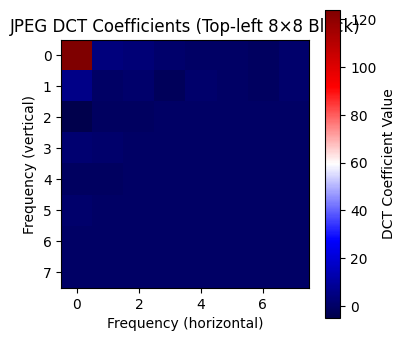

In [8]:
import matplotlib.pyplot as plt
import numpy as np

block = y_coeffs[0, 0]  # top-left 8x8 DCT block

plt.figure(figsize=(4,4))
plt.imshow(block, cmap='seismic')
plt.colorbar(label="DCT Coefficient Value")
plt.title("JPEG DCT Coefficients (Top-left 8×8 Block)")
plt.xlabel("Frequency (horizontal)")
plt.ylabel("Frequency (vertical)")
plt.show()


### Log-magnitude visualization (recommended)

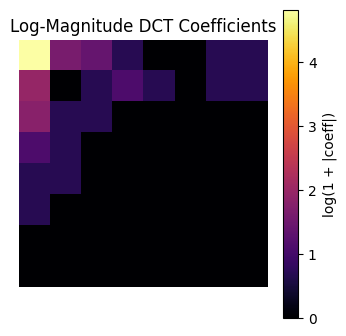

In [9]:
plt.figure(figsize=(4,4))
plt.imshow(np.log1p(np.abs(block)), cmap='inferno')
plt.colorbar(label="log(1 + |coeff|)")
plt.title("Log-Magnitude DCT Coefficients")
plt.axis('off')
plt.show()


In [10]:
### Visualize DC coefficients across the whole image

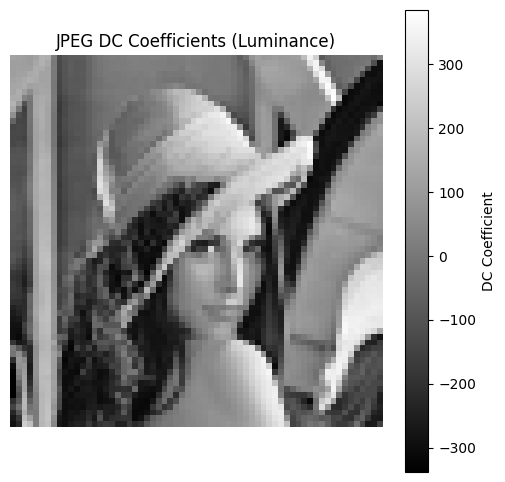

In [11]:
dc_coeffs = y_coeffs[:, :, 0, 0]

plt.figure(figsize=(6,6))
plt.imshow(dc_coeffs, cmap='gray')
plt.colorbar(label="DC Coefficient")
plt.title("JPEG DC Coefficients (Luminance)")
plt.axis('off')
plt.show()


### Visualize a specific frequency across all blocks

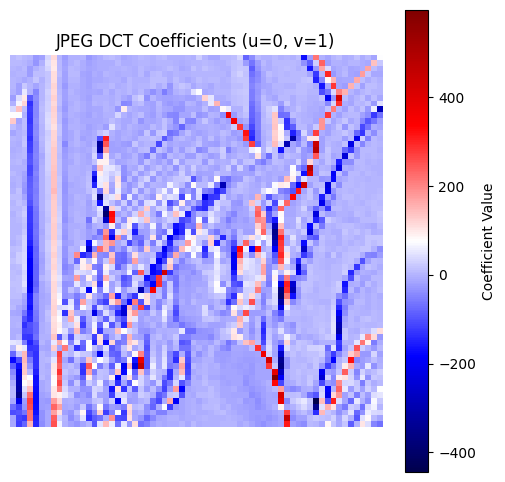

In [12]:
freq_coeffs = y_coeffs[:, :, 0, 1]

plt.figure(figsize=(6,6))
plt.imshow(freq_coeffs, cmap='seismic')
plt.colorbar(label="Coefficient Value")
plt.title("JPEG DCT Coefficients (u=0, v=1)")
plt.axis('off')
plt.show()


### Average frequency energy map (global view)

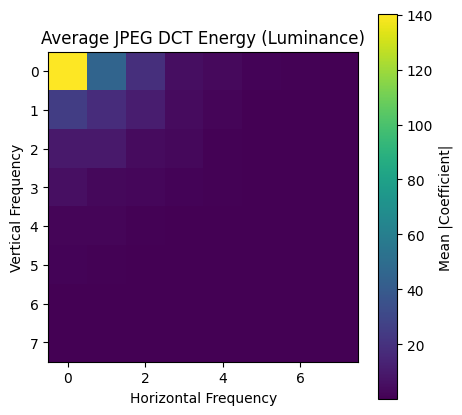

In [14]:
energy = np.mean(np.abs(y_coeffs), axis=(0,1))

plt.figure(figsize=(5,5))
plt.imshow(energy, cmap='viridis')
plt.colorbar(label="Mean |Coefficient|")
plt.title("Average JPEG DCT Energy (Luminance)")
plt.xlabel("Horizontal Frequency")
plt.ylabel("Vertical Frequency")
plt.show()


### Overlay quantization effect (optional, very instructive)

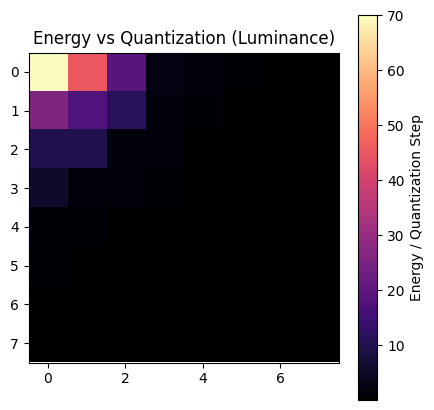

In [15]:
quantized_energy = energy / q_tables[0]

plt.figure(figsize=(5,5))
plt.imshow(quantized_energy, cmap='magma')
plt.colorbar(label="Energy / Quantization Step")
plt.title("Energy vs Quantization (Luminance)")
plt.show()


## Image as Numbers (Grayscale)

Image shape: (512, 512)
Top-left 8x8 pixel values:

[[160 160 160 159 161 156 161 159]
 [161 160 159 159 161 155 161 159]
 [160 161 160 158 161 156 162 159]
 [161 161 159 159 161 156 161 159]
 [160 160 160 159 161 156 162 159]
 [162 162 157 154 159 159 157 159]
 [159 159 162 157 159 161 158 155]
 [157 157 155 155 157 158 155 157]]


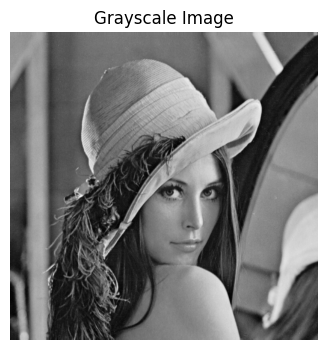

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# Read grayscale image
img = cv2.imread("lena_gray.bmp", cv2.IMREAD_GRAYSCALE)

print("Image shape:", img.shape)
print("Top-left 8x8 pixel values:\n")
print(img[:8, :8])

# Display image
plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()



## Image as Numbers (Color / RGB)

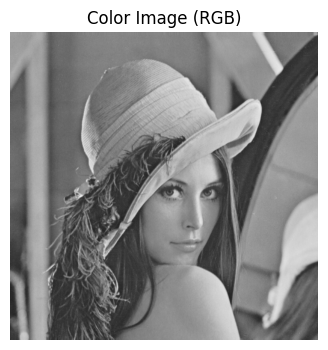

In [2]:
# Read color image (OpenCV loads BGR)
img_bgr = cv2.imread("lena_gray.bmp")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(4,4))
plt.imshow(img_rgb)
plt.title("Color Image (RGB)")
plt.axis('off')
plt.show()


## Image Filtering — Gaussian Blur

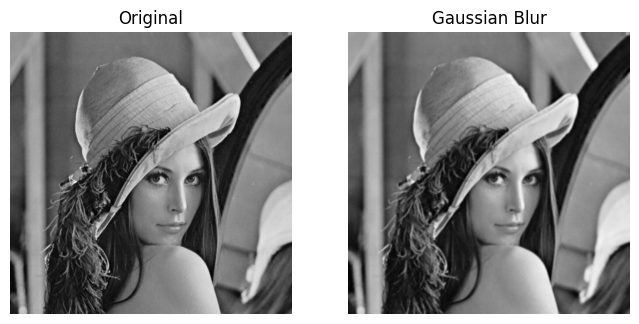

In [3]:
blur = cv2.GaussianBlur(img, (5, 5), sigmaX=1.0)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(blur, cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')

plt.show()


## Image Filtering — Mean Filter (Convolution)

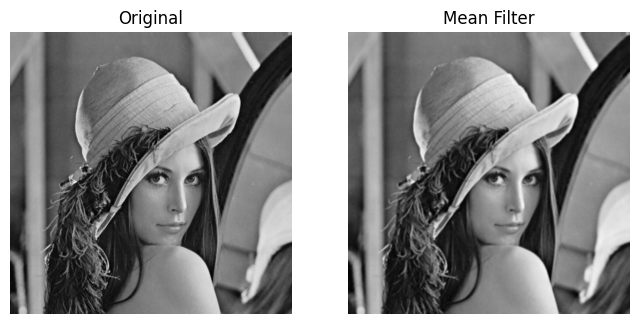

In [4]:
kernel = np.ones((3,3), np.float32) / 9
mean_filtered = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filter")
plt.axis('off')

plt.show()


## Edge Detection — Sobel Operator

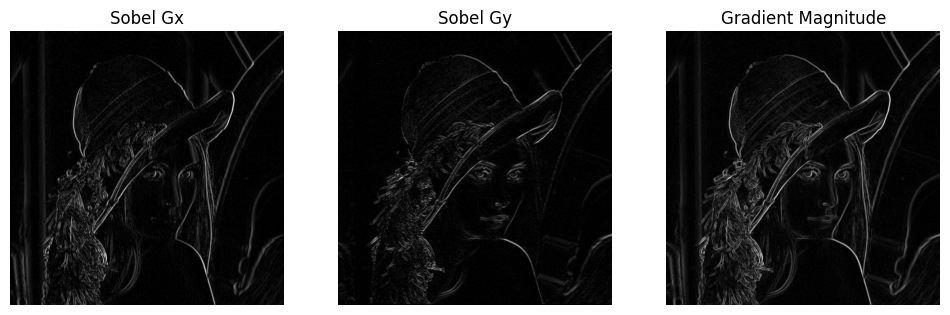

In [6]:
gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

magnitude = np.sqrt(gx**2 + gy**2)
magnitude = np.uint8(255 * magnitude / np.max(magnitude))

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(np.abs(gx), cmap='gray')
plt.title("Sobel Gx")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(np.abs(gy), cmap='gray')
plt.title("Sobel Gy")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis('off')

plt.show()


## Edge Detection — Canny

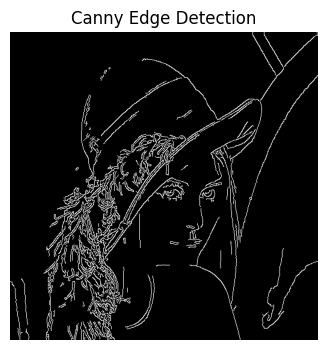

In [7]:
edges = cv2.Canny(img, threshold1=100, threshold2=200)

plt.figure(figsize=(4,4))
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()


## Image as Feature Vector (Flattening)

In [9]:
feature_vector = img.flatten()

print("Feature vector length:", feature_vector.shape[0])
print("First 20 features:", feature_vector[:20])


Feature vector length: 262144
First 20 features: [160 160 160 159 161 156 161 159 162 159 160 158 154 162 158 154 156 155
 160 160]


## Simple Image Classification (Toy Example)

In [11]:
mean_intensity = img.mean()

print("Mean pixel intensity:", mean_intensity)

if mean_intensity > 100:
    label = "Bright Image"
else:
    label = "Dark Image"

print("Predicted class:", label)


Mean pixel intensity: 125.16146087646484
Predicted class: Bright Image


## Optional (Nice for Teaching): Histogram of Intensities

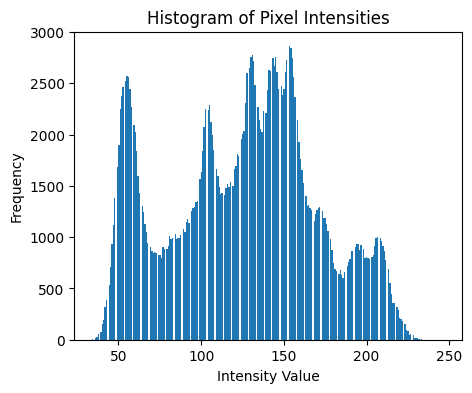

In [12]:
plt.figure(figsize=(5,4))
plt.hist(img.flatten(), bins=256)
plt.title("Histogram of Pixel Intensities")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.show()
